# Import Libraries

In [3]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
from IPython import display
import json
from tqdm import tqdm
from PIL import Image
from rembg import remove
import cv2
from skimage import color
from skimage import io

# Display an Image

### Test Case 1

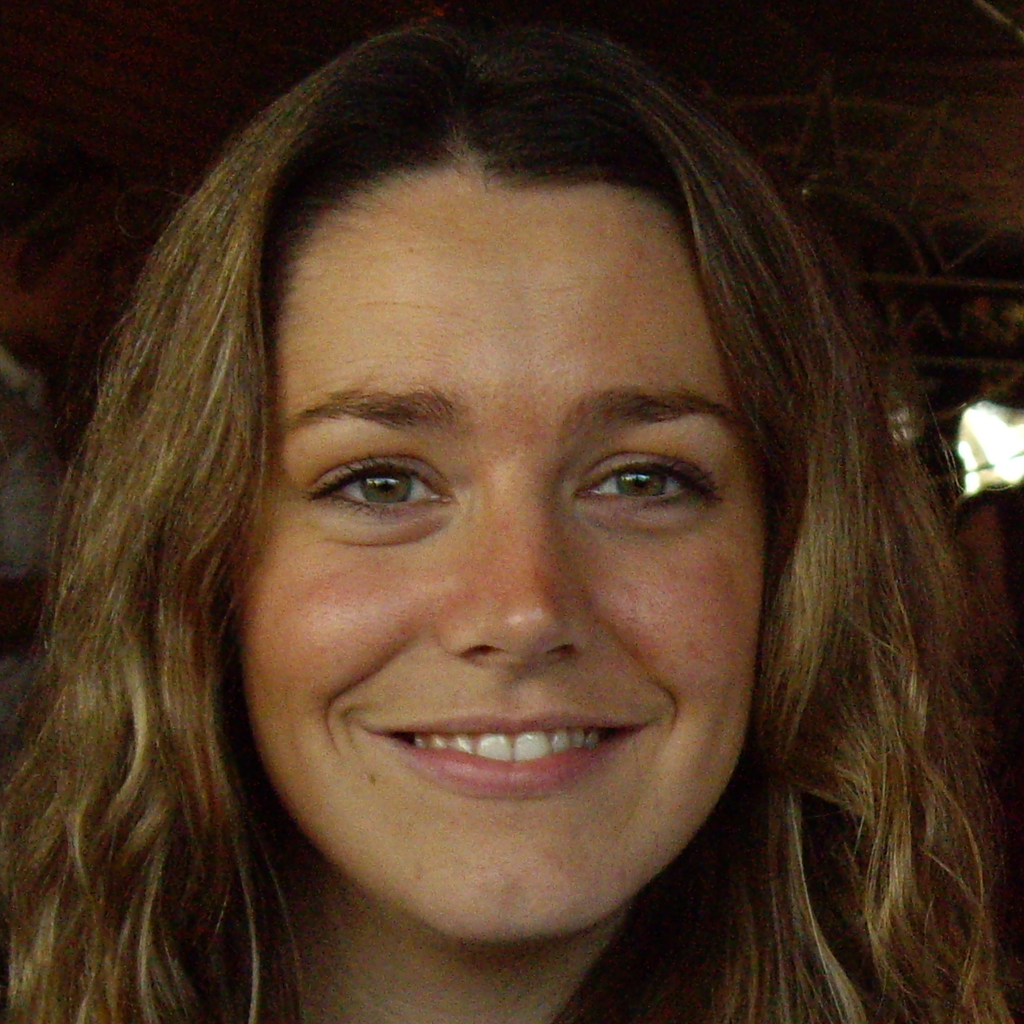

In [45]:
# please change to your desired directory
# display the original image
display.Image("/projectnb/sparkgrp/ml-atfal-mafkoda-grp/female_ffhq/train/30-39/02005.png", width=300)

In [46]:
# read in image as numpy array
# please change to your desired directory
img_path = "/projectnb/sparkgrp/ml-atfal-mafkoda-grp/female_ffhq/train/30-39/02005.png"
image = cv2.imread(img_path)

In [47]:
# Automatic brightness and contrast optimization with optional histogram clipping
# Input is an image as numpy array, and clip_hist_percent
# output is the alpha and beta values for contrast and brightness control
def automatic_brightness_and_contrast(image, clip_hist_percent=1):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    # Calculate grayscale histogram
    hist = cv2.calcHist([gray],[0],None,[256],[0,256])
    hist_size = len(hist)
    
    # Calculate cumulative distribution from the histogram
    accumulator = []
    accumulator.append(float(hist[0]))
    for index in range(1, hist_size):
        accumulator.append(accumulator[index -1] + float(hist[index]))
    
    # Locate points to clip
    maximum = accumulator[-1]
    clip_hist_percent *= (maximum/100.0)
    clip_hist_percent /= 0.9
    
    # Locate left cut
    minimum_gray = 0
    while accumulator[minimum_gray] < clip_hist_percent:
        minimum_gray += 1
    
    # Locate right cut
    maximum_gray = hist_size -1
    while accumulator[maximum_gray] >= 2*(maximum - clip_hist_percent):
        maximum_gray -= 1
    
    # Calculate alpha and beta values
    alpha = 255 / (maximum_gray - minimum_gray)
    beta = -minimum_gray * alpha
    
#     # Calculate new histogram with desired range and show histogram 
#     new_hist = cv2.calcHist([gray],[0],None,[256],[minimum_gray,maximum_gray])
#     plt.plot(hist)
#     plt.plot(new_hist)
#     plt.xlim([0,256])
#     plt.show()

    auto_result = cv2.convertScaleAbs(image, alpha=alpha, beta=beta)
    return alpha, beta

In [48]:
# display alpha and beta values
image = cv2.imread(img_path)
alpha, beta = automatic_brightness_and_contrast(image)
print('alpha', alpha) # Contrast control
print('beta', beta) # Brightness control

alpha 1.0240963855421688
beta -6.144578313253012


In [49]:
# read in image as numpy array
img= Image.open(img_path)
np_img = np.array(img)
# adjust the image's contrast and brightness based on alpha and beta values
data = cv2.convertScaleAbs(np_img, alpha = alpha, beta = beta)

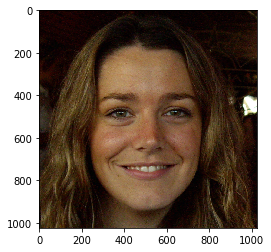

In [50]:
# display the image after adjusting the brightness and contrast
plt.imshow(data, interpolation='nearest')
plt.show()

In [51]:
# save the image after adjusting contrast and brightness
im = Image.fromarray(data)
# please change to your desired directory
im.save("../test_remove_background/test1_contrast.png")

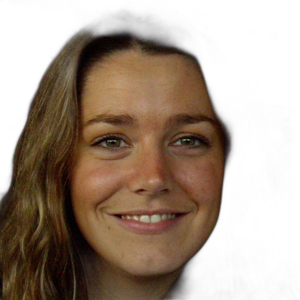

In [52]:
# remove the background
# display the image without the background
# please change to your desired directory
input_path = "/projectnb/sparkgrp/ml-atfal-mafkoda-grp/test_remove_background/test1_contrast.png"
input = Image.open(input_path)
output3 = remove(input)
output3.thumbnail((300, 300))
output3

### Test Case 2

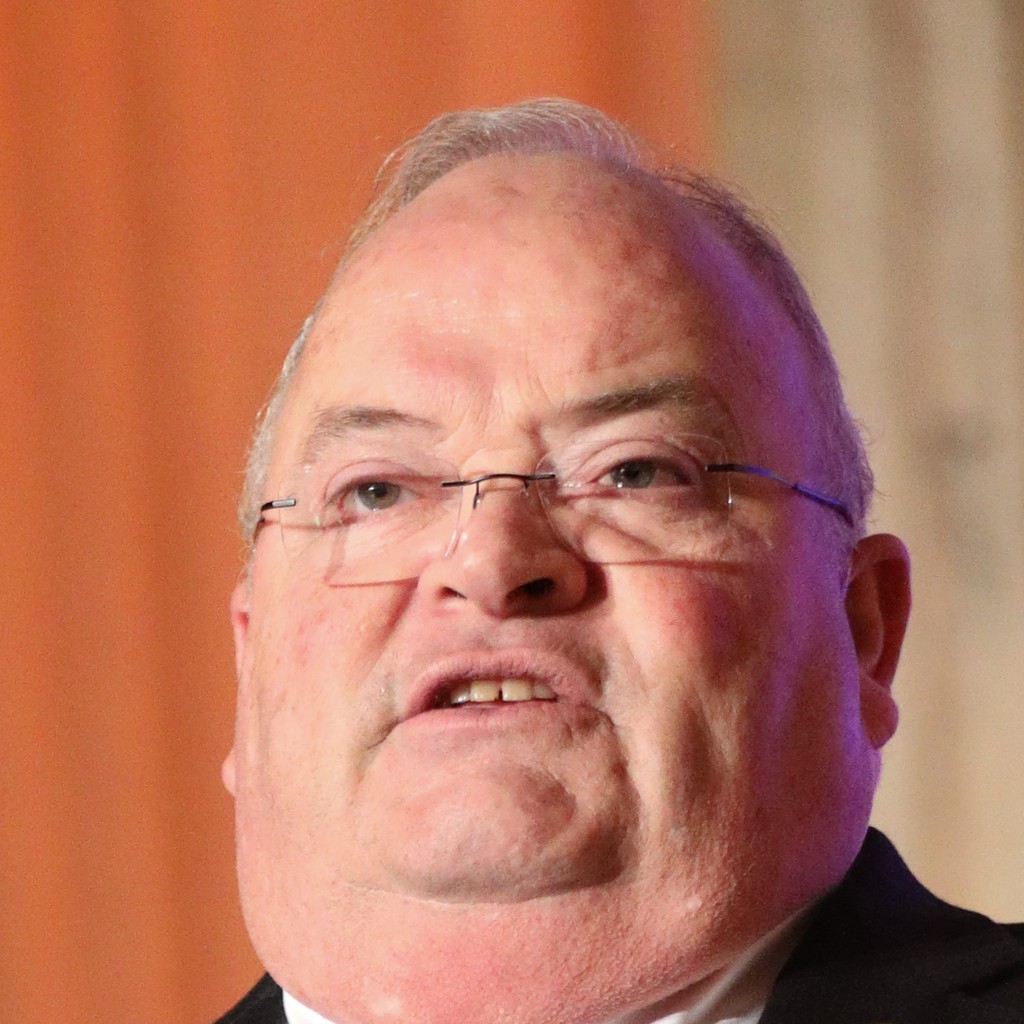

In [53]:
# display the original image
# please change to your desired directory
display.Image("/projectnb/sparkgrp/ml-atfal-mafkoda-grp/images1024x1024/02000/02241.png", width = 300)

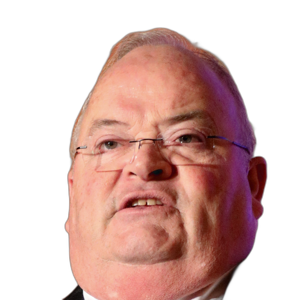

In [55]:
# please change to your desired directory
img_path = "/projectnb/sparkgrp/ml-atfal-mafkoda-grp/images1024x1024/02000/02241.png"
#read in image as np.array
img= Image.open(img_path)
np_img = np.array(img)

# get the alpha and beta values
image = cv2.imread(img_path)
alpha, beta = automatic_brightness_and_contrast(image)

# adjust the image based on the original image
data = cv2.convertScaleAbs(np_img, alpha = alpha, beta = beta)
im = Image.fromarray(data)
# please change to your desired directory
im.save("../test_remove_background/test2_contrast.png")
# please change to your desired directory
input_path = "../test_remove_background/test2_contrast.png"

# removing the background
input = Image.open(input_path)
output5 = remove(input)
output5.thumbnail((300, 300))
#display the ouput image
output5